## Import the Libraries

In [ ]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Import the Dataset 

In [7]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data

--2020-07-10 01:52:45--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘car.data.1’

car.data.1          100%[===================>]  50.65K  --.-KB/s    in 0.1s    

2020-07-10 01:52:46 (401 KB/s) - ‘car.data.1’ saved [51867/51867]



## Explore the Dataset 

In [8]:
column_names = ['price','buying','maint','doors','persons','lug_boot','safety']  

dataset = pd.read_csv('car.data', names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   price     1728 non-null   object
 1   buying    1728 non-null   object
 2   maint     1728 non-null   object
 3   doors     1728 non-null   object
 4   persons   1728 non-null   object
 5   lug_boot  1728 non-null   object
 6   safety    1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [10]:
dataset['safety'].unique()

array(['unacc', 'acc', 'vgood', 'good'], dtype=object)

In [11]:
def categorical_to_numericla(value):
  if value=='unacc':
    return(0)
  elif value=='acc':
    return(1)
  elif value=='good': 
    return(2)
  else:
    return(3)

dataset['safety']=dataset['safety'].apply(lambda x: categorical_to_numericla(x))

In [12]:
y=dataset.pop('safety')
X=dataset

## Convert Categorical Columns into Numerical Columns 

In [13]:
ordinalencoder = OrdinalEncoder()
ordinalencoder.fit(X)
X_transformed = ordinalencoder.transform(X)
X_transformed

array([[3., 3., 0., 0., 2., 1.],
       [3., 3., 0., 0., 2., 2.],
       [3., 3., 0., 0., 2., 0.],
       ...,
       [1., 1., 3., 2., 0., 1.],
       [1., 1., 3., 2., 0., 2.],
       [1., 1., 3., 2., 0., 0.]])

## SelectKBest Implementation

In [14]:
selectkbest = SelectKBest(score_func=chi2, k=3)
selectkbest.fit(X_transformed, y)
best_columns = selectkbest.transform(X)
best_columns

array([['2', 'small', 'low'],
       ['2', 'small', 'med'],
       ['2', 'small', 'high'],
       ...,
       ['more', 'big', 'low'],
       ['more', 'big', 'med'],
       ['more', 'big', 'high']], dtype=object)

## Visualize with Barplot 

[Text(0, 0.5, 'Importance'), Text(0.5, 0, 'Columns')]

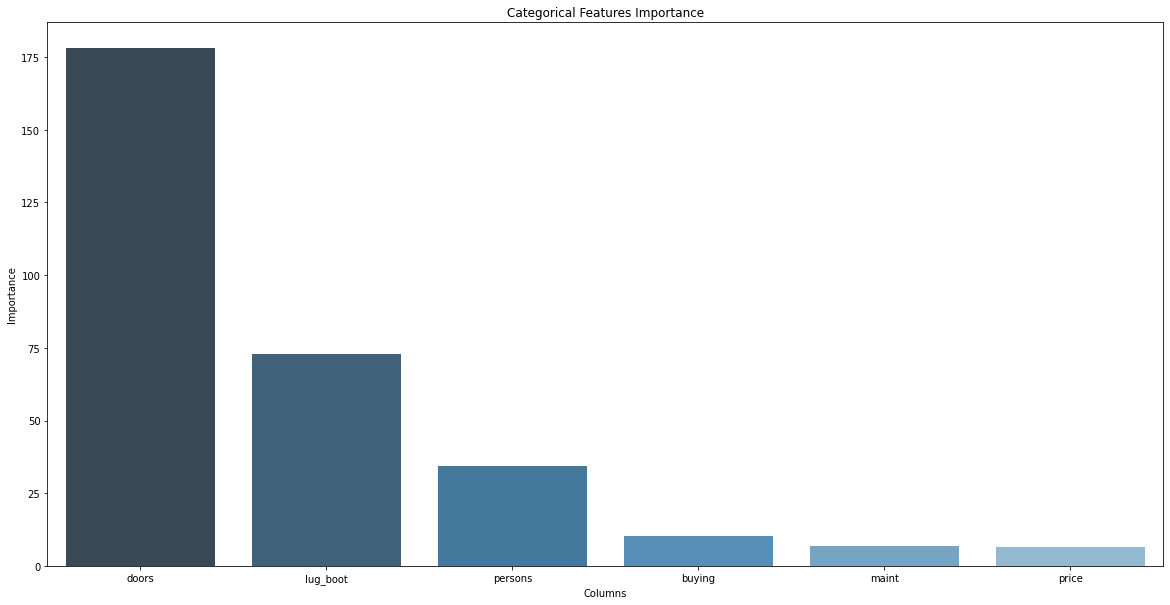

In [17]:
indices = np.argsort(selectkbest.scores_)[::-1]

features = []
for i in range(6):
    features.append(X.columns[indices[i]])

fig, ax = plt.subplots(figsize=(20,10))     

sns.barplot(x=features, y=selectkbest.scores_[indices[range(6)]],\
            label="Importtant Categorical Features", palette=("Blues_d"),ax=ax).set_title('Categorical Features Importance')

ax.set(xlabel="Columns", ylabel = "Importance")